In [5]:
import os
import tensorflow as tf
from tensorflow.keras import datasets

# GPU 선택 (0번 GPU만 사용하도록 제한)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# TensorFlow 로그 최소화
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# GPU 확인
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [6]:
from tensorflow.keras import datasets 

mnist = datasets.mnist 

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))


In [9]:
import tensorflow as tf 
import numpy as np
model = tf.keras.models.Sequential ([
    tf.keras.layers.Conv2D( 32, kernel_size=(5,5), strides=(1,1),
                           padding = 'same', activation = 'relu',
                            input_shape=(28, 28, 1)), # 28 28 1 -> single channel 
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)),
    tf.keras.layers.Conv2D(65, (2,2), activation='relu', padding ='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax')
])

In [10]:
model.compile( optimizer='adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=10, batch_size= 200,
                 verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8702 - loss: 0.4332 - val_accuracy: 0.9842 - val_loss: 0.0485
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9817 - loss: 0.0582 - val_accuracy: 0.9900 - val_loss: 0.0335
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9874 - loss: 0.0416 - val_accuracy: 0.9916 - val_loss: 0.0247
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9905 - loss: 0.0285 - val_accuracy: 0.9899 - val_loss: 0.0298
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9917 - loss: 0.0252 - val_accuracy: 0.9890 - val_loss: 0.0310
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9941 - loss: 0.0193 - val_accuracy: 0.9931 - val_loss: 0.0237
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9945 - loss: 0.0156 - val_accuracy: 0.9909 - val_loss: 0.0285
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9951 - loss: 0.0141 - val_accuracy: 0

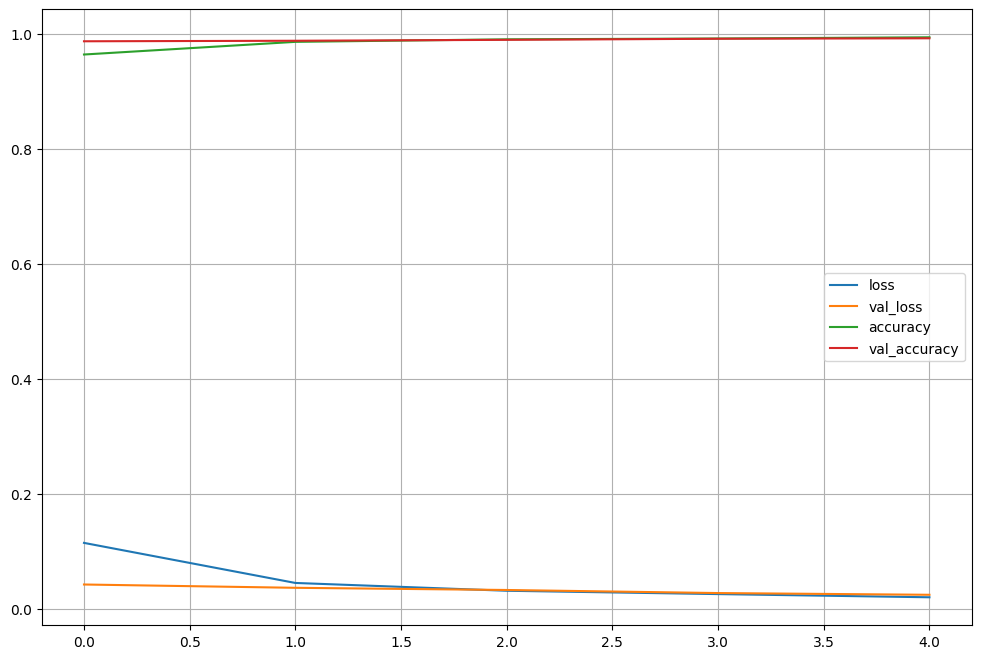

In [5]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12, 8))
for each in plot_target:
    plt.plot(hist.history[each], label=each)
plt.legend()
plt.grid()
plt.show()

In [6]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9897 - loss: 0.0309
Test loss : 0.02459726110100746
Test accuracy : 0.9918000102043152


## That's so lit ,, ,!  99%~

In [8]:
import numpy as np 

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10] 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [9]:
wrong_result = []

for n in range (0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
len(wrong_result)

82

In [10]:
import random 

samples = random.choices(population=wrong_result, k=16)
samples

[3767,
 7856,
 7847,
 3767,
 2952,
 4838,
 3808,
 2406,
 2597,
 1709,
 5265,
 2130,
 4699,
 2654,
 3762,
 4740]

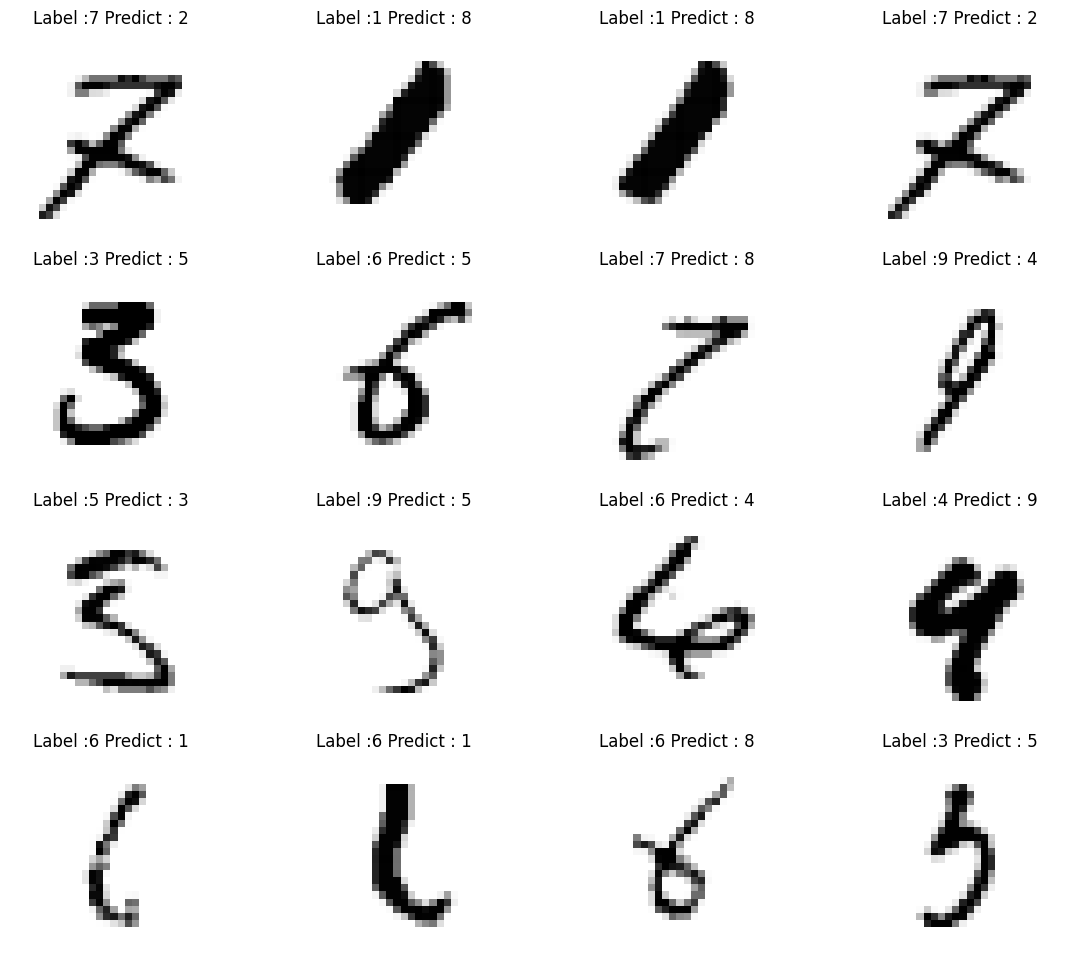

In [11]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label :' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

In [12]:
model.save('MNIST_CNN_model.h5')